## K-means clustering: Unsupervised
## Allow the algo to group the penguins by itself using the parameters in the dataset
## Tries and minimises variance inside each of this group -- Minimise the cost function
## It uses the summation of the square of euclidean distance


## Steps
######  1. Assign each point to it's closest centre
######  2. Recalculate the centroid with this new added point and existing centre
######  3. This is the new centre
######  4. Do until the centroid doesn't move anymore


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('data/penguins.csv')
df.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.dtypes

Unnamed: 0             int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [5]:
# bill_length, bill_depth, flipper_length, body_mass needed for evaluation
features = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
features.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


In [6]:
features = features.dropna() # Distance calculation wont pass with nulls
features.shape

(342, 4)

In [7]:
# Do the scaling (x-avg)/std because distance formula can get overpowered
scaler = StandardScaler()
X = scaler.fit_transform(features)
# fit --> it'll just store the mean and std
# transform --> it'll do the actual scaling, X form the 4D vector dataspace 

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42) # random state for reproducibility and 3 clusters we want to find
kmeans.fit(X) # kmeans find 3 centroids

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [9]:
labels = kmeans.labels_ # which cluster each data point belongs to
centroids = kmeans.cluster_centers_ # centroid coodinate
labels[:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2], dtype=int32)

In [10]:
features['Cluster'] = labels # cluster labels onto og dataset
features.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Cluster
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,2
2,40.3,18.0,195.0,3250.0,2
4,36.7,19.3,193.0,3450.0,2
5,39.3,20.6,190.0,3650.0,2


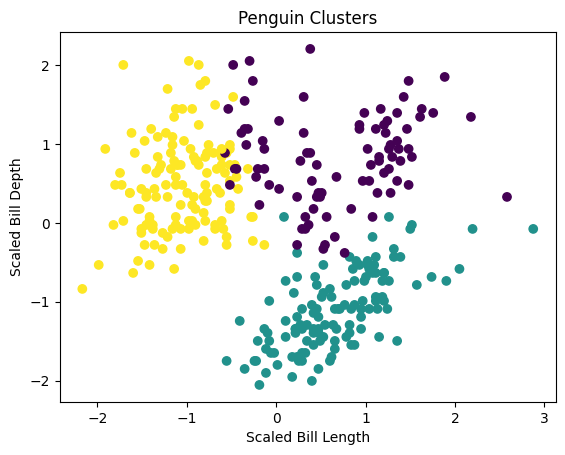

In [11]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.xlabel("Scaled Bill Length")
plt.ylabel("Scaled Bill Depth")
plt.title("Penguin Clusters")
plt.show()

In [12]:
# Actual comparison (for my understanding)
df2 = df[['species','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].dropna()
X2 = scaler.transform(df2[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']])
# DO NOT FIT AGAIN BECAUSE IT'LL CHANGE THE MEAN AND STD

In [13]:
predicted_clusters = kmeans.predict(X2)
df2['Cluster'] = predicted_clusters
df2.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Cluster
0,Adelie,39.1,18.7,181.0,3750.0,2
1,Adelie,39.5,17.4,186.0,3800.0,2
2,Adelie,40.3,18.0,195.0,3250.0,2
4,Adelie,36.7,19.3,193.0,3450.0,2
5,Adelie,39.3,20.6,190.0,3650.0,2


In [14]:
# Confusion matrix
pd.crosstab(df2['species'], df2['Cluster']) # list of tp,tn,fp,fn


Cluster,0,1,2
species,,,
Adelie,24,0,127
Chinstrap,63,0,5
Gentoo,0,123,0


In [16]:
#ARI
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(df2['species'], df2['Cluster'])
print("Ari:", ari)

Ari: 0.7928369051321087


In [ ]:
# ARI doesn't measure accuracy but rather the similarity between the true labels and the predicted clusters, adjusted for chance. It ranges from -1 to 1, where 1 indicates perfect agreement, 0 indicates random labeling, and negative values indicate less agreement than expected by chance.
# F1 score and other metrics dont apply cause we don't have true labels for each cluster, we just have the species which is not a direct label for the clusters.

## Decision Trees
### Supervised learning: The labels are known
#### Node = Question; Branch: Possibility; Leaf: Final tree
#### Entropy is used i.e. summation of p(i)*log(p(i))^2 to the base 2
#### Trees try to minimise entropy using Information Gain and chooses the highest IG



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Algo
from sklearn.preprocessing import LabelEncoder # Text to num
from sklearn.model_selection import train_test_split # split
from sklearn import tree # to see

In [18]:
dfn = pd.read_csv('data/drug200.csv')
dfn.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [19]:
# Drug = Target so split
X = dfn.drop('Drug', axis=1)
y = dfn['Drug']

In [20]:
# conversion
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])
# IMP: Numbers have no value significance if M=1, F=0 then M is not greater than F 

In [21]:
# 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# actual algo
model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
model.fit(X_train, y_train)
# entropy formula
# max depth to not overfit
predictions = model.predict(X_test)
print(predictions)

['drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugA' 'drugB' 'drugY' 'drugB' 'drugX'
 'drugC' 'drugY' 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugC' 'drugY' 'drugA' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugA']


In [23]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 1.0


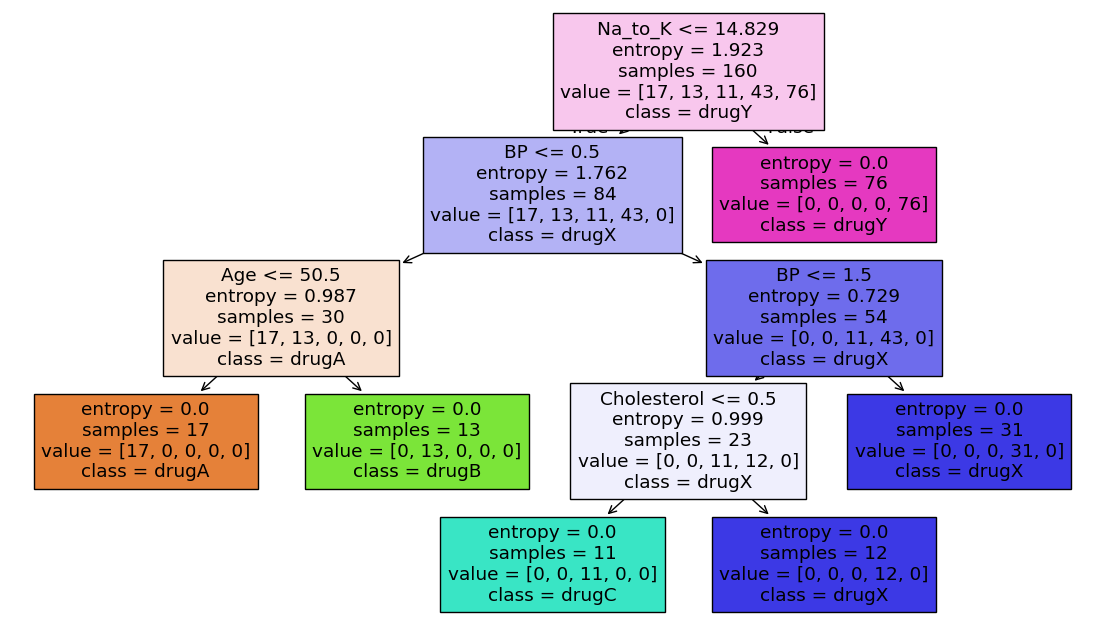

In [24]:
# Tree 
plt.figure(figsize=(14,8))
tree.plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

In [26]:
# The accuracy is 1.0 might be overfit
# check for my ref
dfn.groupby('Drug')["Na_to_K"].mean()


Drug
drugA    10.918783
drugB    11.524375
drugC    10.633750
drugX    10.650556
drugY    22.374780
Name: Na_to_K, dtype: float64

In [ ]:
# The value of Na_to_K makes this too rule based maybe why the score is 1
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores)
print("Average accuracy:", scores.mean())
# Not overfitting the dataset is just simple

[1.    1.    1.    0.925 1.   ]
Average accuracy: 0.985


In [28]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
# Train vs Test

Train accuracy: 1.0
Test accuracy: 1.0


In [ ]:
# Therefore not ovefit